# Question 2

In [49]:
#importation des différentes bibliothéques
import pandas as pd #importation de la bibliothéque pandas pour le traitement des dataframe
import matplotlib.pyplot as plt # importation du module pyplot de la bibliothéque matplotlib pour la visualisation 
import numpy as np #importation de la bibliothéque numpy pour effectuer des calculs numéiques

In [50]:
#1_Enregistrement dans un format adapté
ligne1 = pd.Series([18,7,14,31,21,5,11,16,26,29]) #on transforme la ligne n°1 en Série
ligne2 = pd.Series([55,17,36,85,62,18,33,41,63,87]) #on transforme la ligne n°2 en Série
#La série est un tableau étiqueté unidimensionnel capable de contenir des données de tout type (entier, chaîne, flottant, objets python, etc.). Les étiquettes d'axe sont appelées collectivement index.
df= pd.DataFrame({"xi": ligne1, "yi": ligne2}) #création d'un dataframe à partir des séries
df

,xi,yi
0,18,55
1,7,17
2,14,36
3,31,85
4,21,62
5,5,18
6,11,33
7,16,41
8,26,63
9,29,87


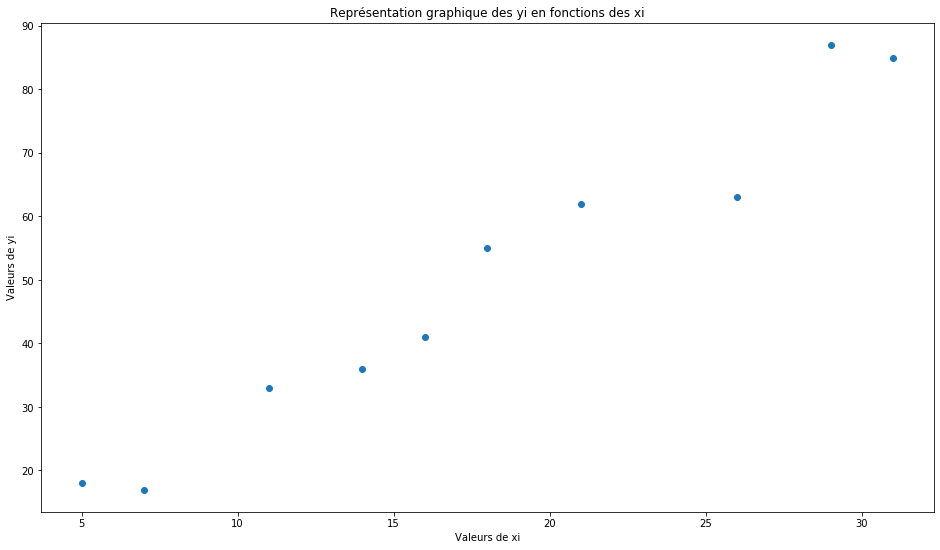

In [51]:
#2_Représentez les yi en fonction des xi
plt.scatter(df.xi, df.yi) #nuage de point 
plt.xlabel('Valeurs de xi') #axe des abscisses
plt.ylabel('Valeurs de yi') #axe des ordonnées
plt.title("Représentation graphique des yi en fonctions des xi") #titre
plt.rcParams["figure.figsize"] = [16,9] #paramétrage du fenêtre graphique utliser rcParams
plt.savefig("Graphique des yi en fonctions des xi.png", bbox_inches = "tight")# bbox = "tight" permet de bien proportionner le graphique lors de l'enregistrement
plt.draw() #permet d'enlever les messages qui apparaissent avec la représentation graphique

In [31]:
#D'aprés la représentation graphique nous pouvons soupçonner une liaison linéaire entre ces deux variables car on a l'imprssion 
#que les point sont situés de part et et d'autre suivant l'allure d'une droite. 

In [52]:
#3_Déterminer la dte des MCO ie les coefficients de cor de la droite des MCO
def CalculCoefficients(xi, yi):
    #y = ax + b droite de régression de y en x
    #On applique les formules  de a (coefficient directeur de la droite) et b (ordonnée à l'origine) 
    
    n = np.size(xi)   #n représente la taille de l'échantillon xi = taille de l'échantillon yi
    moyenne_x = np.mean(xi) #moyenne de l'échantillon xi  
    moyenne_y = np.mean(yi) #moyenne de l'échcantillon yi
    somme_xy = n*np.sum(xi*yi) - np.sum(xi)*np.sum(yi) #numérateur de la formule de a
    somme_xx = n*np.sum(xi**2) - (np.sum(xi))**2 #dénominateur de la formule de b
    a = somme_xy / somme_xx #rapport de la somme_xy(numérateur de a) sur la somme_xx(dénominateur de a)
    b = moyenne_y - a*moyenne_x  #différence de la moyenne_y et de a multiplier par la moyenne_x
    return(round(a, 3), round(b, 3)) #arrondis des résultats à 3 chiffres aprés la virgule

print("Les coefficients de a et b sont respectivement:", CalculCoefficients(df.xi, df.yi))

Les coefficients de a et b sont respectivement: (2.735, 1.021)


In [53]:
#4_Donner les ordonnées des yi calculés par la droite des moindres carrés correspondant aux différentes valeurs des xi
a=2.735
b = 1.021
yi = []                         #initialisation d'une liste vide
for x in df.xi:
    yi.append(round(a*x + b,4)) #ajout des des valeurs de xi à chaque tour de boucle
print("Les différentes de yi sont:", yi)

Les différentes de yi sont: [50.251, 20.166, 39.311, 85.806, 58.456, 14.696, 31.106, 44.781, 72.131, 80.336]


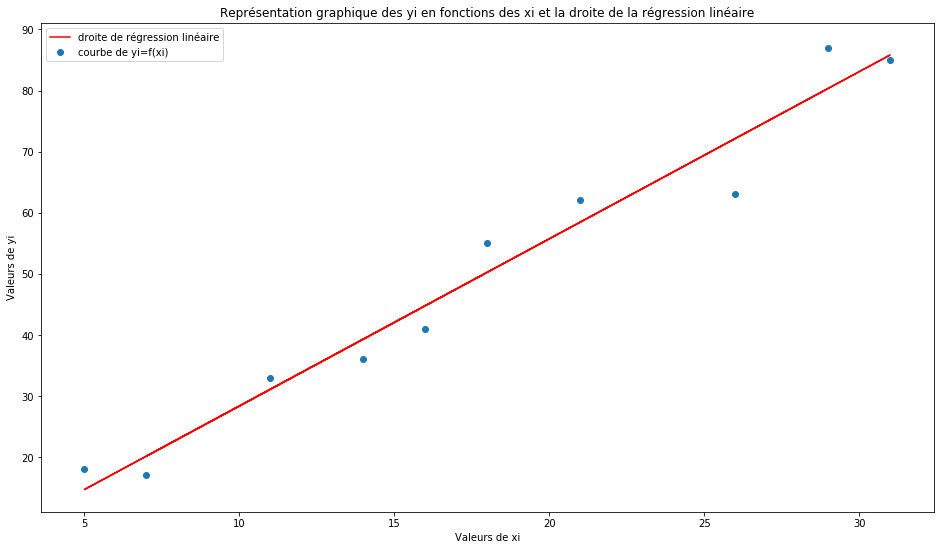

In [54]:
#5_Tracer ensuite la droite sur le même graphique
plt.plot(df.xi, yi, c = 'r', label = 'droite de régression linéaire') #trace la droite de la régression linéaire en rouge
plt.scatter(df.xi, df.yi,label = 'courbe de yi=f(xi)') #nuage de point 
plt.xlabel('Valeurs de xi') #axe des abscisses
plt.ylabel('Valeurs de yi') #axe des ordonnées
plt.legend() #affiche la légende
plt.title("Représentation graphique des yi en fonctions des xi et la droite de la régression linéaire") #titre
plt.rcParams["figure.figsize"] = [16,9] #paramétrage du fenêtre graphique utliser rcParams
plt.savefig("Graphique des yi en fonctions des xi et de la droite de la régression linéaire.png", bbox_inches = "tight")# bbox = "tight" permet de bien proportionner le graphique lors de l'enregistrement
plt.draw() #permet d'enlever les messages qui apparaissent avec la représentation graphique

In [55]:
#6_Estimation plausible de Y à xi = 21
a=2.735
b = 1.021
y = 0
xi = 21
for x in df.xi:
    if x == xi:
        y += round(a*x + b,3)
print("La valeur de Y à xi = 21 est:", y)

La valeur de Y à xi = 21 est: 58.456


In [56]:
#7_Quel est l’écart entre la valeur observée de Y à xi = 21 et la valeur estimée avec la droite des
#moindres carrés ? Comment appelons-nous cet écart ?

#valeur estimée avec la droite des MCO:
xi = 21
y = 58.456
#valeur de y à ajuster:
xi= 21
yi= 62
#écart:
d = yi - y
print("Cet écart est appelé l'erreur entre la valeur observée de Y à xi = 21 et celle estimée à la même abscisse avec la droite des moindres carrées ordinaoires. Sa valeur est:", np.round(d, 3))

Cet écart est appelé l'erreur entre la valeur observée de Y à xi = 21 et celle estimée à la même abscisse avec la droite des moindres carrées ordinaoires. Sa valeur est: 3.544


In [57]:
#8_Est-ce que la droite des moindres carrés obtenue en 2. passe par le point (¯x, ¯y) ? Pouvons-nous
#généraliser cette conclusion à n’importe laquelle droite de régression ?


#Pour répondre à cette question cherchons d'abord les valeurs de la moyenne des xi et celle des yi
x_moy = np.mean(df.xi) 
y_moy = np.mean(df.yi)
y = round(a*x_moy + b,1) #remplace x_moy dans l'équation pour vérifier si on sur x_moy
if y == y_moy:
    print("La droite des moindres carrés passe par le point de moyen de coordonnés: ({} ,{})".format(x_moy, y_moy))
else:
    print("La droite des moindres carrés ne passe pas par le point moyen de coordonnés {} et {}".format(x_moy, y_moy))

La droite des moindres carrés passe par le point de moyen de coordonnés: (17.8 ,49.7)


#### Généralisation: 
"""Vue que  la formule du coeficient directeur de la droite de régression est donné par b = y_moy - a*x_moy et en remplaçant
b dans l'équation de la droite de régression: y = ax + b on tombe sur a = y - y_moy / x - x_moy on peut donc généraliser 
que pour n'importe droite de régression passe par le point moyen.
NB: x_moy : moyenne des valeurs de x
    y_moy: moyenne des valeurs de y"""